In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
#### LOADIN IRIS DATA SET
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [99]:
#creating dataframe from iris dataset and printing it out to the console.

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})




In [100]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [101]:
# Splitting the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data['species']

In [102]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(<Axes: xlabel='count', ylabel='species'>,
 Text(0.5, 0.98, 'Distribution of Iris Dataset'))

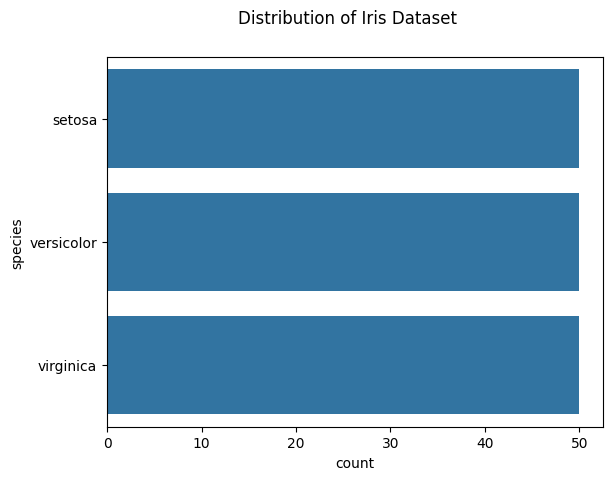

In [103]:
sns.countplot(data['species']), plt.suptitle('Distribution of Iris Dataset') # distribution of iris dataset

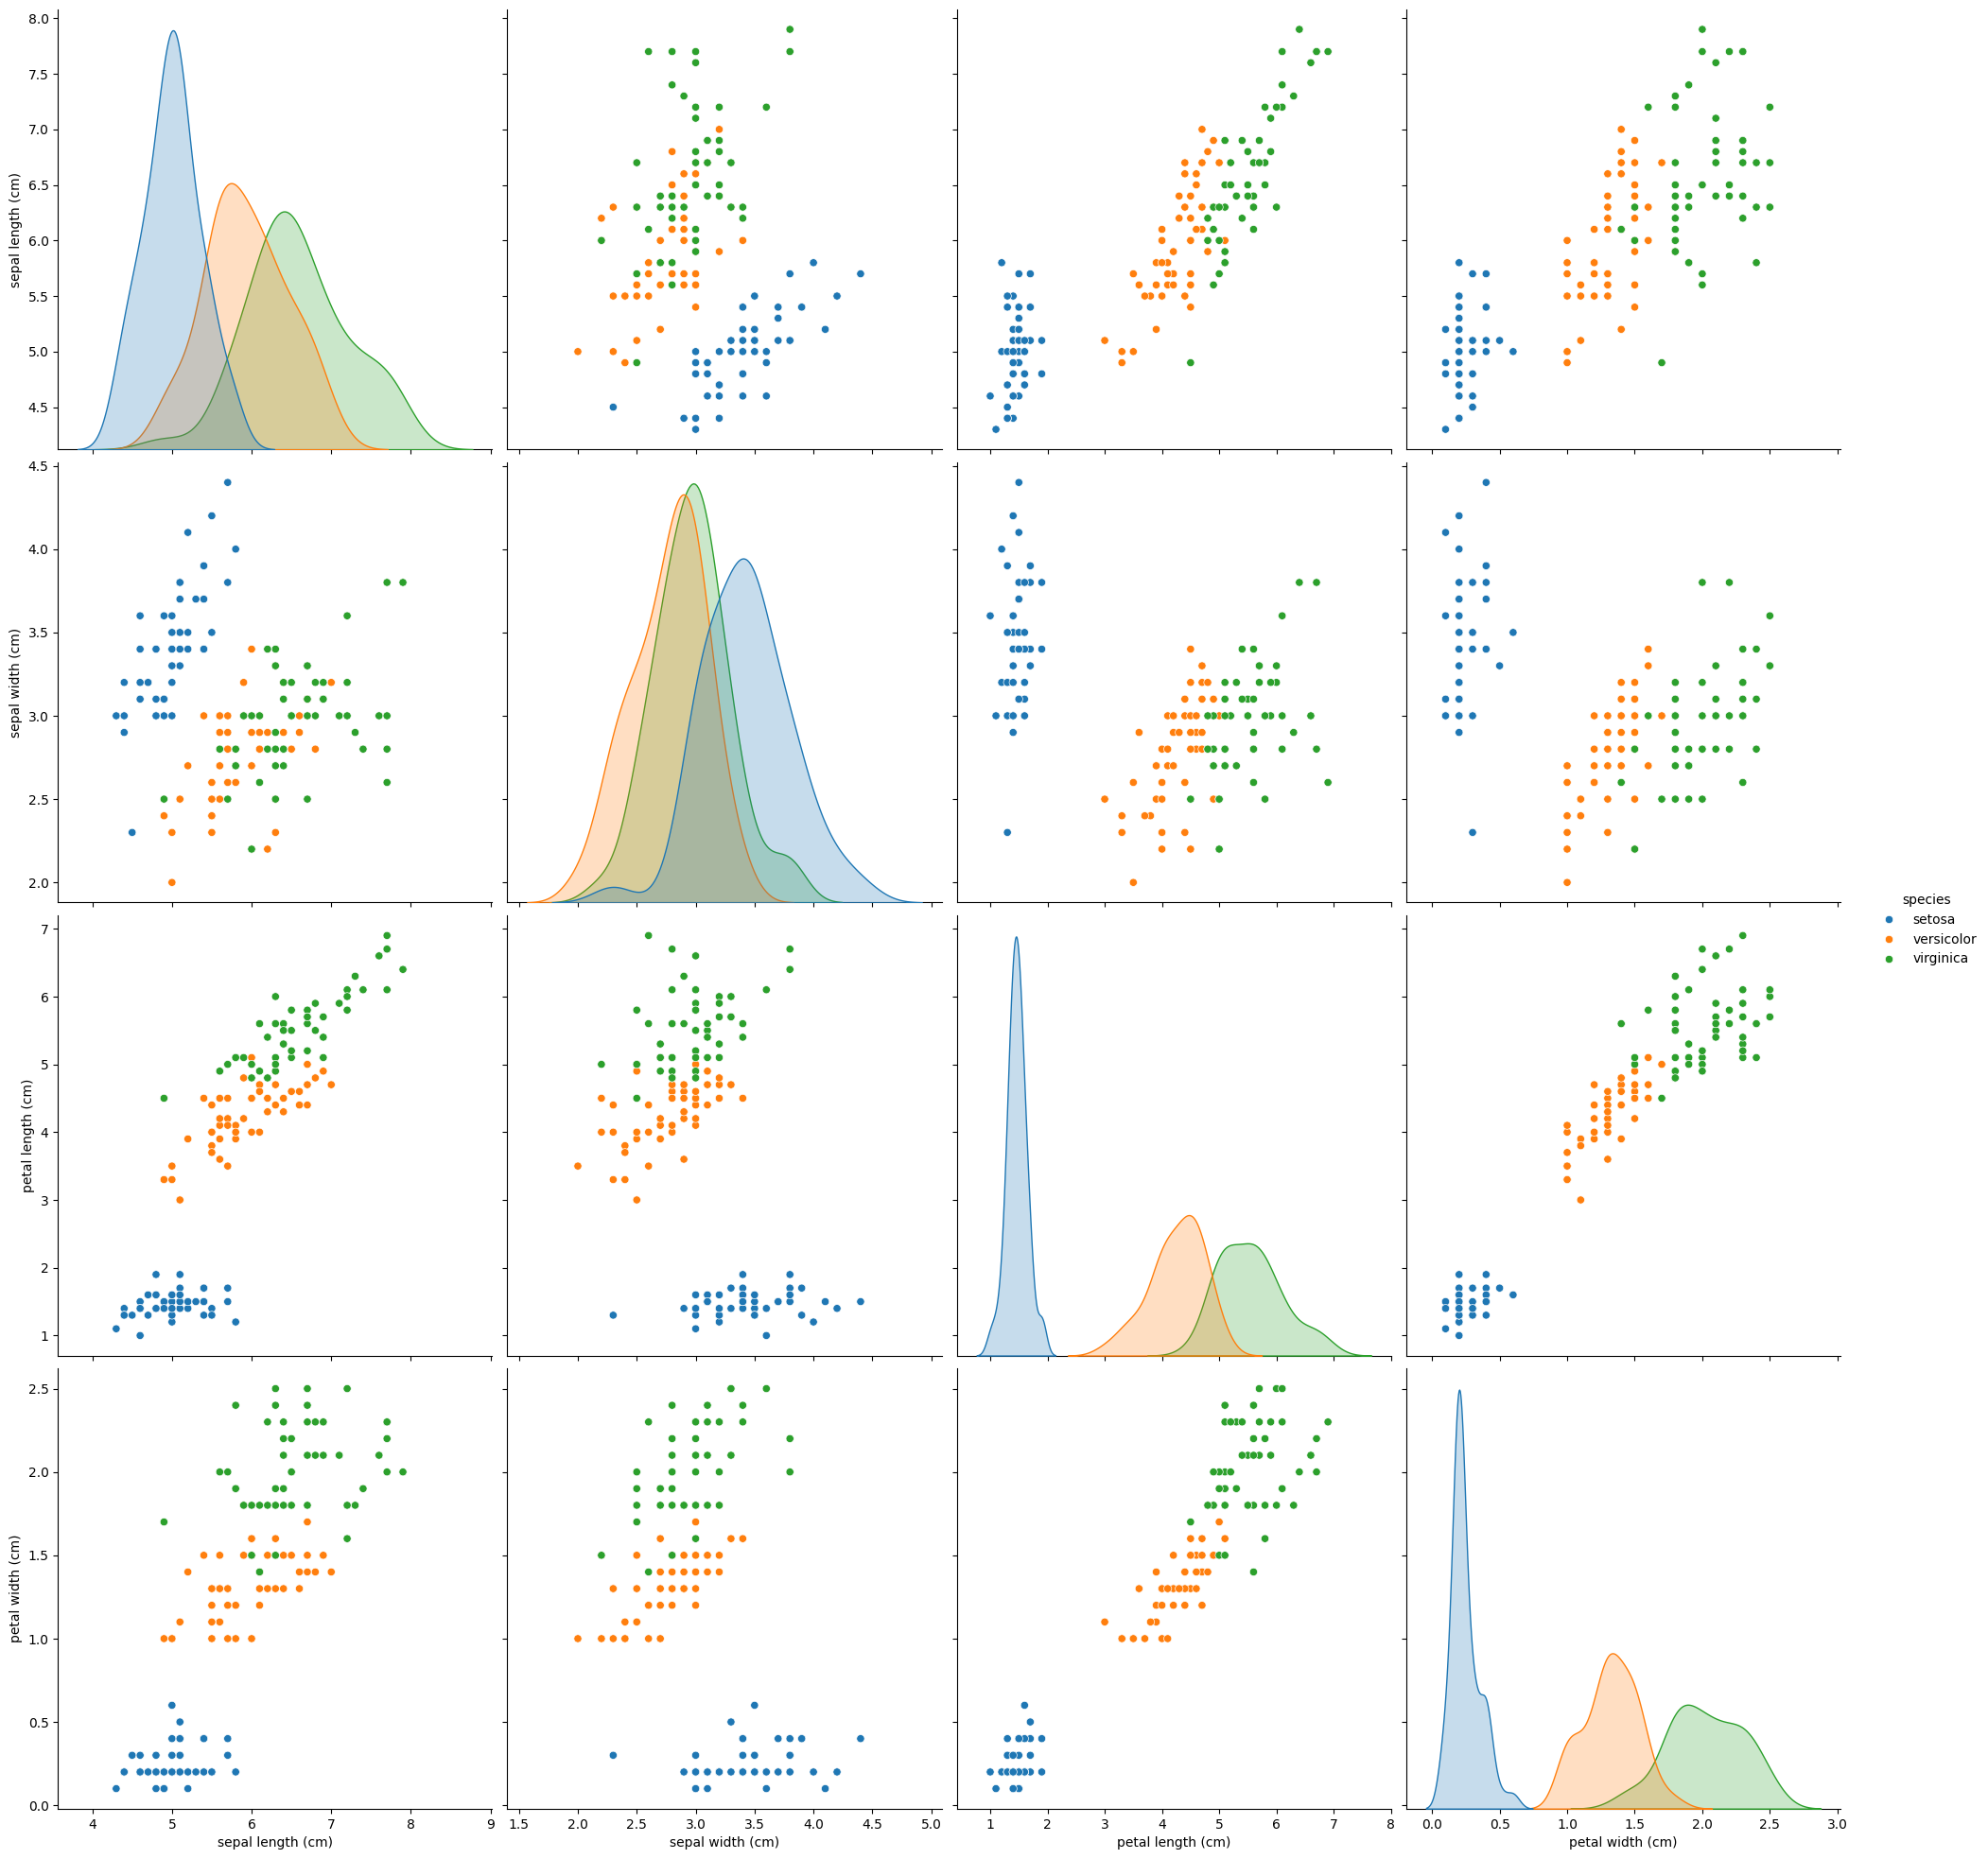

In [104]:
# graphical visualization of the dataset

sns.pairplot(data, hue="species", height=5, aspect=1)# Splitting the data into features (X) and target (y)

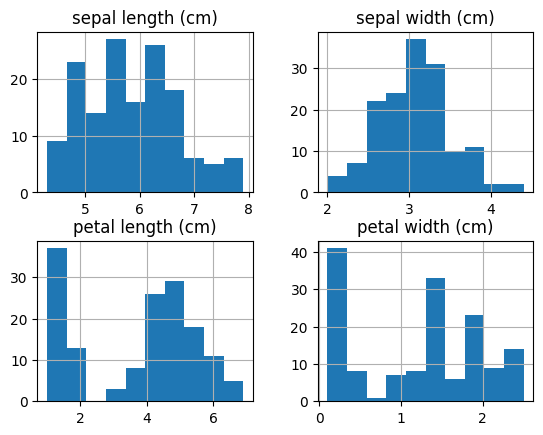

In [105]:
#### bar graph representation 

data.hist()
plt.show()

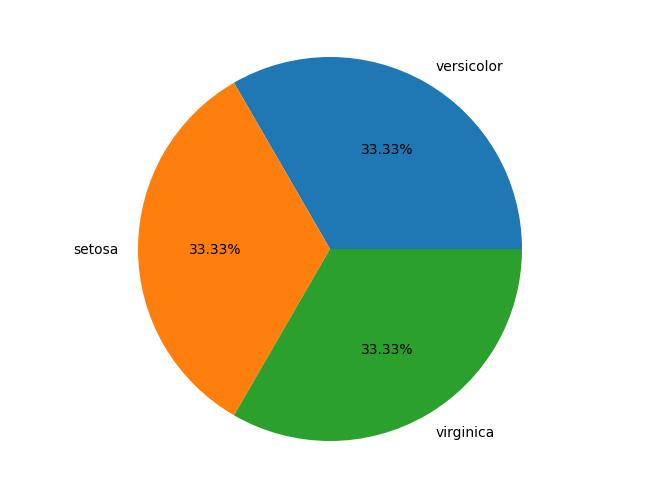

In [106]:
## PIE CHART

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l =['versicolor','setosa','virginica']
s =[40,40,40]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()


In [107]:
# split data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [108]:
# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [126]:
# Making predictions
prediction_rf = model.predict(X_test)

In [110]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



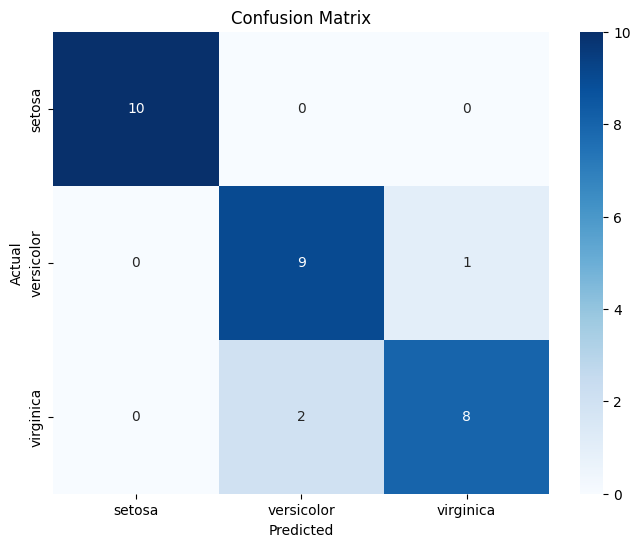

In [111]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [112]:
### SVM
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train, y_train)

SVC()

In [113]:
# Making predictions
prediction_svm = model.predict(X_test)

In [114]:
from sklearn.metrics import  accuracy_score

print("accuracy_score:", accuracy_score(y_test,prediction_svm)*100)

accuracy_score: 90.0


In [115]:
# LOGISTIC REGRESSION
from sklearn.tree import  DecisionTreeClassifier

model_dtc=DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
# prdict model 

prediction_dtc=model_dtc.predict(X_test)# Evaluate Model Accuracy Using Cross-Validation Technique (10 Fold Cross Validation)

In [117]:
print("accuracy_score:", accuracy_score(y_test,prediction_dtc)*100)

accuracy_score: 96.66666666666667


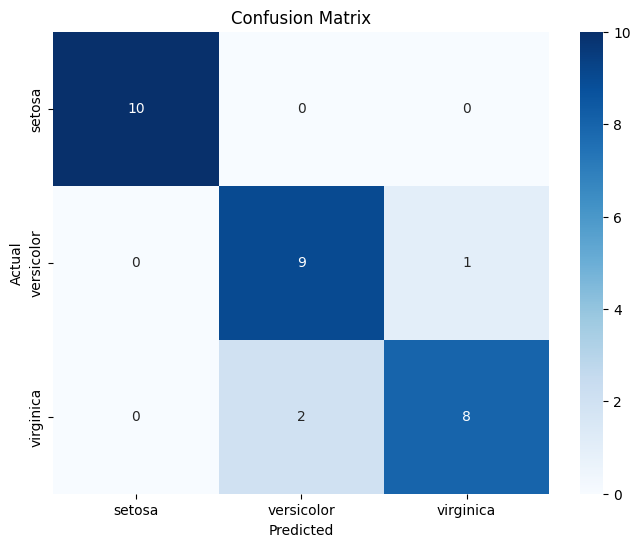

In [118]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [119]:
#### LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)# Making predictions and

LogisticRegression()

In [120]:
## preict model 

prediction_lr = model_lr.predict(X_test)

In [121]:
print("accuracy_score:", accuracy_score(y_test,prediction_lr)*100)

accuracy_score: 96.66666666666667


In [122]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': iris.feature_names, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_72684\2637643622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


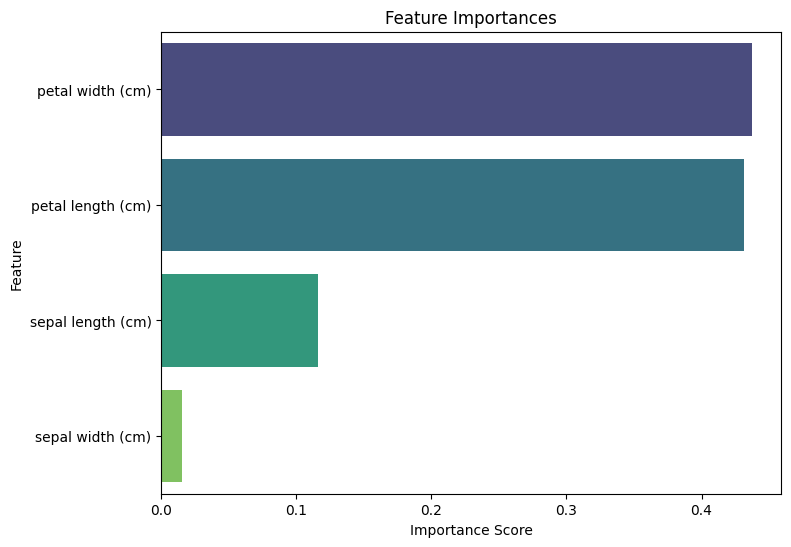

In [123]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [128]:
#### DETAIL REPORT OF PROJECT

# Assuming you have already calculated the predictions and confusion matrices for all models:
result = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest Classifier', 'DecisionTreeClassifier', 'SVM'],
    'accuracy_score': [
        accuracy_score(y_test, prediction_lr) * 100, 
        accuracy_score(y_test, prediction_rf) * 100,
        accuracy_score(y_test, prediction_dtc) * 100,
        accuracy_score(y_test, prediction_svm) * 100
    ],
    'confusion_matrix': [
        confusion_matrix(y_test, prediction_lr).tolist(),
        confusion_matrix(y_test, prediction_rf).tolist(),
        confusion_matrix(y_test, prediction_dtc).tolist(),
        confusion_matrix(y_test, prediction_svm).tolist()
    ]
})

print(result)


                      model  accuracy_score  \
0       Logistic Regression       96.666667   
1  Random Forest Classifier       90.000000   
2    DecisionTreeClassifier       96.666667   
3                       SVM       90.000000   

                      confusion_matrix  
0  [[10, 0, 0], [0, 9, 1], [0, 0, 10]]  
1   [[10, 0, 0], [0, 9, 1], [0, 2, 8]]  
2  [[10, 0, 0], [0, 9, 1], [0, 0, 10]]  
3   [[10, 0, 0], [0, 9, 1], [0, 2, 8]]  


The table compares four models for classification accuracy and confusion matrices. Logistic Regression and DecisionTreeClassifier achieved the highest accuracy (96.67%), while Random Forest and SVM performed slightly lower, highlighting each model's predictive performance and misclassification patterns.